In [1]:
from sleap_io.io.nwb import *
from sleap_io.io.main import *

from pynwb import NWBHDF5IO
import numpy as np
import pygfx as gfx
from wgpu.gui.auto import WgpuCanvas

RFBOutputContext()

JupyterWgpuCanvas()
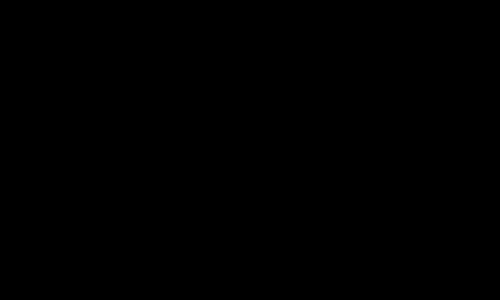

In [2]:
canvas = WgpuCanvas()
renderer = gfx.WgpuRenderer(canvas)
scene = gfx.Scene()
colors = [(255, 0, 0, 1.0), (0, 255, 0, 1.0), (0, 0, 255, 1.0), (255, 255, 0, 1.0), (0, 255, 255, 1.0), (255, 0, 255, 1.0)]

with NWBHDF5IO("tests/data/nwb/labels.v002.nwb", mode="r", load_namespaces=True) as io:
    nwbfile = io.read()
    processing_module = list(nwbfile.processing.values())[0]
    pose_training = processing_module.data_interfaces["PoseTraining"]
    training_frames = list(pose_training.training_frames.training_frames.values())
    # frame_index = input(f"Enter the index of the frame you want to visualize (range: {0} - {len(training_frames)-1}): ")
    frame_index = 0
    skeleton_instances = training_frames[int(frame_index)].skeleton_instances
    skeleton_instances_list = list(skeleton_instances.skeleton_instances.values())

    for i, instance in enumerate(skeleton_instances_list):
        node_locations = np.array(instance.node_locations)
        node_locations -= 100
        node_locations = np.hstack((node_locations, np.ones((node_locations.shape[0], 1)))).astype(np.float32)
        points = gfx.Points(
            gfx.Geometry(positions=node_locations),
            gfx.PointsMaterial(size=4, color=(255, 255, 255, 1.0)),
        )
        scene.add(points)

        for node1, node2 in instance.skeleton.edges:
            edge = node_locations[[node1, node2]]
            scene.add(gfx.Line(
                gfx.Geometry(positions=edge),
                gfx.LineMaterial(color=colors[i], thickness=1.0),
            ))

scene.add(gfx.Background(material=gfx.BackgroundMaterial("#000000")))
camera = gfx.OrthographicCamera(1, 1)
canvas.request_draw(lambda: renderer.render(scene, camera))
canvas